In [8]:
# !pip install mat4py
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir='/content/drive/MyDrive/ucd/'
base_dir='../../../folders/'

In [9]:
import numpy as np
import pandas as pd
import pickle
from scipy import interp, signal
import scipy.stats as stats
import pandas as pd
from datetime import datetime
import pickle
from mat4py import loadmat
import math
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model,load_model
from keras.layers import Conv1D, Conv2D,MaxPooling1D,MaxPooling2D, Dropout,Dense,Flatten,Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import scipy.stats as stats
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [10]:
subjects = pd.read_csv(base_dir + 'data/SubjectDetails.csv')
subjects = subjects[['Study Number', 'Study_Duration_hr']]
print(subjects.head())

  Study Number  Study_Duration_hr
0     UCDDB002               6.20
1     UCDDB003               7.30
2     UCDDB005               6.90
3     UCDDB006               6.72
4     UCDDB007               6.80


In [11]:
data_base=[f'ucddb{i:003d}' for i in range(2, 29)]
data_base.remove('ucddb004')
data_base.remove('ucddb016')
print(data_base)

['ucddb002', 'ucddb003', 'ucddb005', 'ucddb006', 'ucddb007', 'ucddb008', 'ucddb009', 'ucddb010', 'ucddb011', 'ucddb012', 'ucddb013', 'ucddb014', 'ucddb015', 'ucddb017', 'ucddb018', 'ucddb019', 'ucddb020', 'ucddb021', 'ucddb022', 'ucddb023', 'ucddb024', 'ucddb025', 'ucddb026', 'ucddb027', 'ucddb028']


ucddb002
Class=0, n=121 (16.176%)
Class=2, n=385 (51.471%)
Class=3, n=87 (11.631%)
Class=1, n=155 (20.722%)


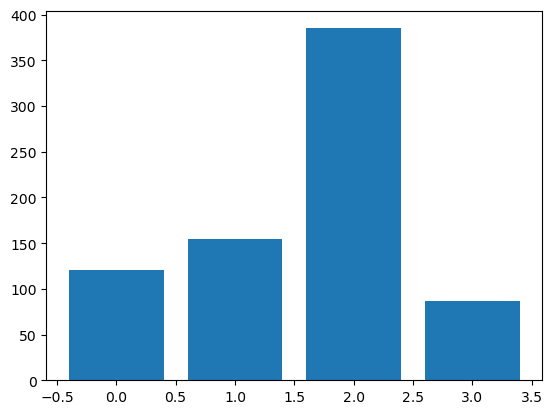

ucddb003
Class=0, n=168 (19.048%)
Class=2, n=360 (40.816%)
Class=3, n=164 (18.594%)
Class=1, n=190 (21.542%)


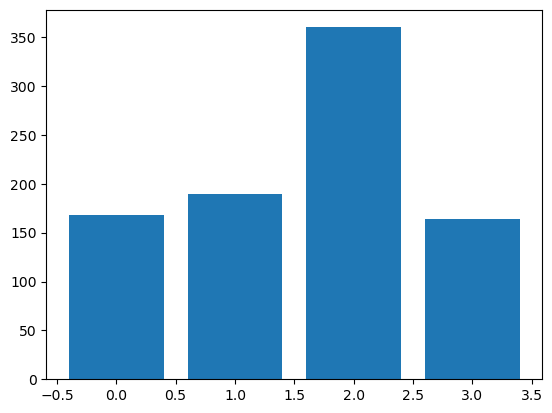

ucddb005
Class=0, n=309 (37.409%)
Class=2, n=340 (41.162%)
Class=3, n=52 (6.295%)
Class=1, n=125 (15.133%)


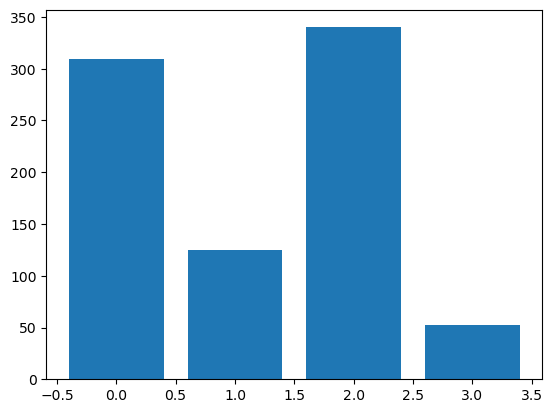

ucddb006
Class=0, n=92 (11.386%)
Class=2, n=276 (34.158%)
Class=3, n=248 (30.693%)
Class=1, n=192 (23.762%)


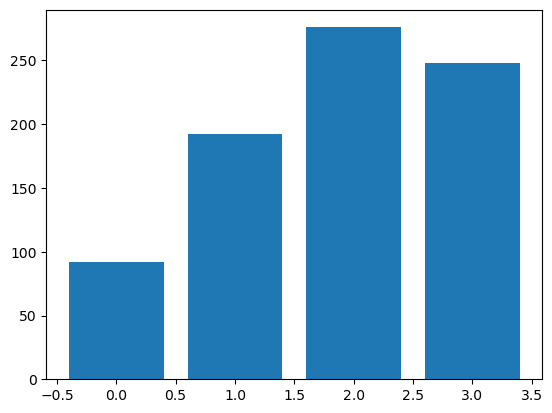

ucddb007
Class=0, n=84 (10.332%)
Class=2, n=470 (57.811%)
Class=3, n=127 (15.621%)
Class=1, n=132 (16.236%)


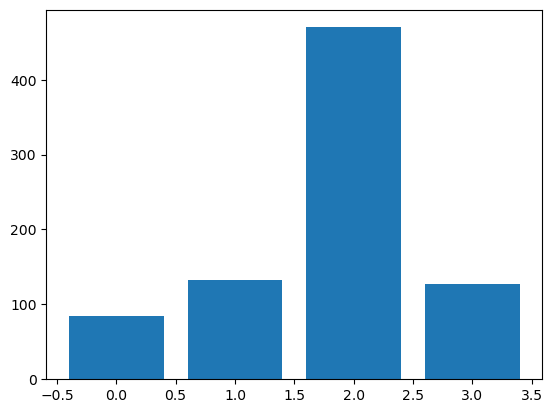

ucddb008
Class=0, n=263 (34.245%)
Class=2, n=378 (49.219%)
Class=3, n=83 (10.807%)
Class=1, n=33 (4.297%)
Class=4, n=11 (1.432%)


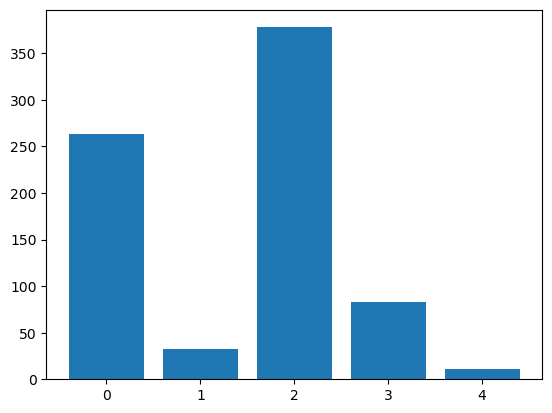

ucddb009
Class=0, n=190 (20.541%)
Class=2, n=505 (54.595%)
Class=3, n=141 (15.243%)
Class=1, n=89 (9.622%)


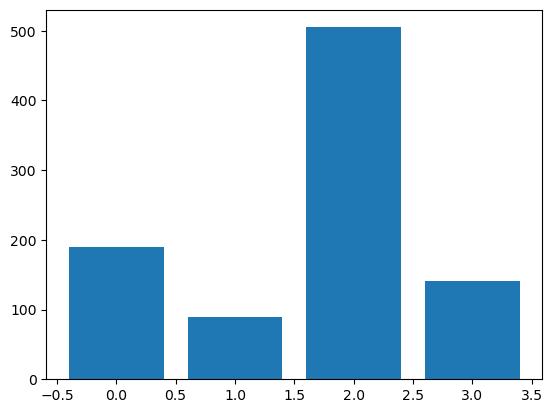

ucddb010
Class=0, n=74 (8.159%)
Class=2, n=585 (64.498%)
Class=3, n=79 (8.710%)
Class=1, n=169 (18.633%)


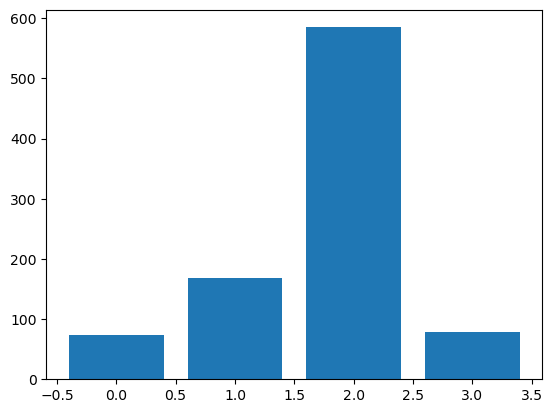

ucddb011
Class=0, n=356 (39.556%)
Class=2, n=384 (42.667%)
Class=1, n=42 (4.667%)
Class=3, n=118 (13.111%)


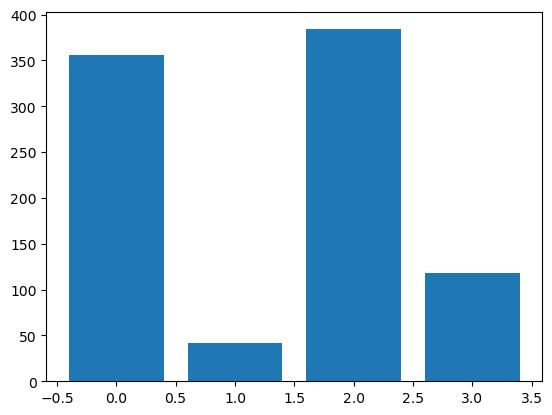

ucddb012
Class=0, n=129 (14.931%)
Class=2, n=395 (45.718%)
Class=3, n=146 (16.898%)
Class=1, n=194 (22.454%)


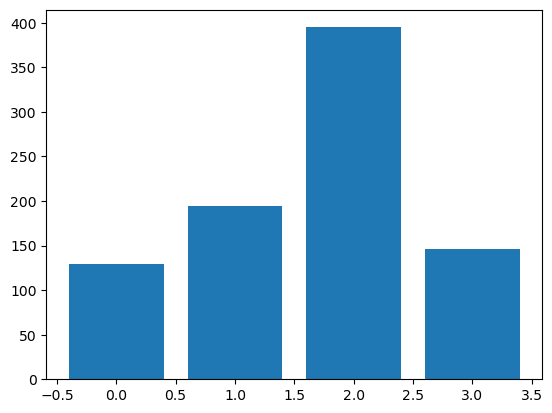

ucddb013
Class=0, n=317 (39.088%)
Class=2, n=316 (38.964%)
Class=3, n=111 (13.687%)
Class=1, n=67 (8.261%)


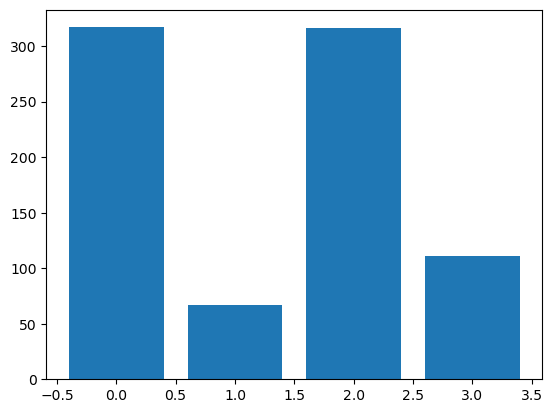

ucddb014
Class=0, n=165 (21.318%)
Class=2, n=527 (68.088%)
Class=1, n=82 (10.594%)


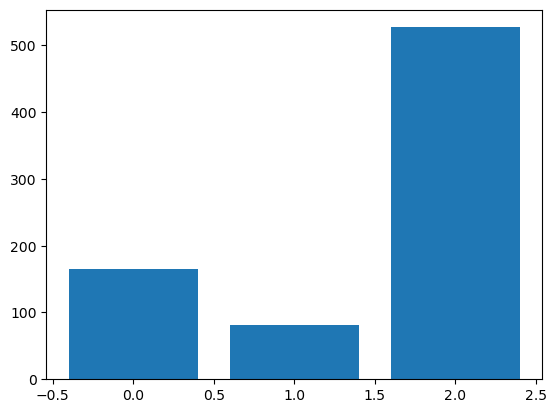

ucddb015
Class=0, n=208 (22.707%)
Class=2, n=494 (53.930%)
Class=3, n=146 (15.939%)
Class=1, n=68 (7.424%)


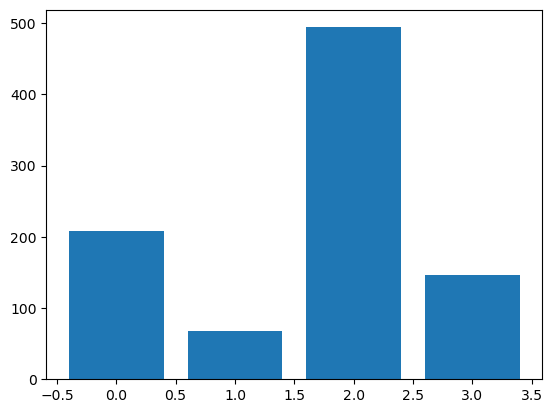

ucddb017
Class=0, n=103 (13.054%)
Class=2, n=428 (54.246%)
Class=3, n=65 (8.238%)
Class=1, n=193 (24.461%)


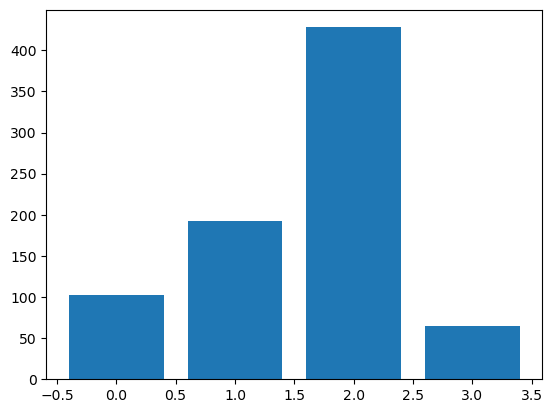

ucddb018
Class=0, n=328 (39.903%)
Class=2, n=338 (41.119%)
Class=3, n=137 (16.667%)
Class=1, n=19 (2.311%)


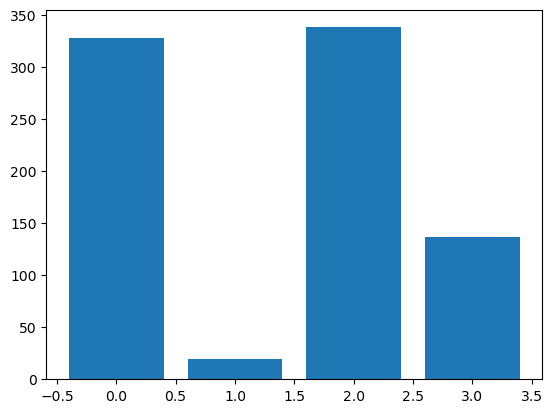

ucddb019
Class=0, n=71 (8.333%)
Class=2, n=399 (46.831%)
Class=3, n=196 (23.005%)
Class=1, n=186 (21.831%)


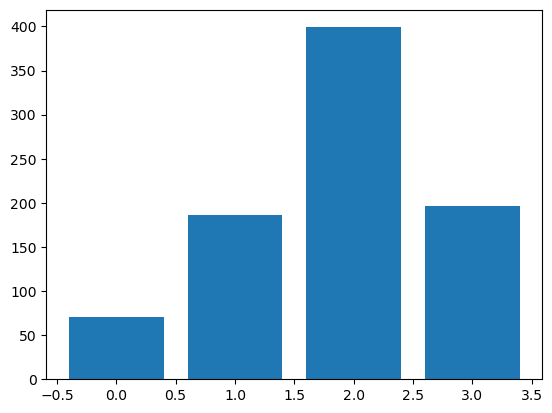

ucddb020
Class=0, n=169 (22.473%)
Class=2, n=363 (48.271%)
Class=1, n=156 (20.745%)
Class=3, n=64 (8.511%)


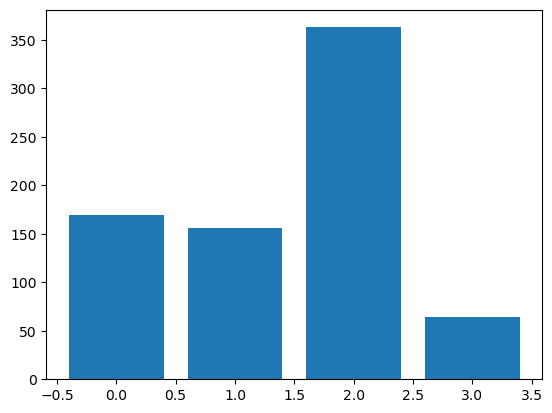

ucddb021
Class=0, n=166 (18.182%)
Class=2, n=492 (53.888%)
Class=3, n=127 (13.910%)
Class=1, n=128 (14.020%)


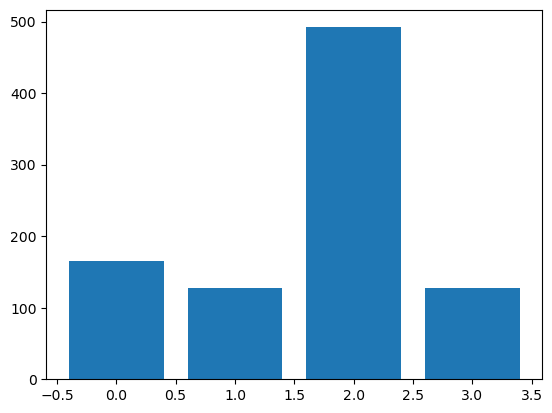

ucddb022
Class=0, n=327 (41.550%)
Class=2, n=285 (36.213%)
Class=3, n=131 (16.645%)
Class=1, n=44 (5.591%)


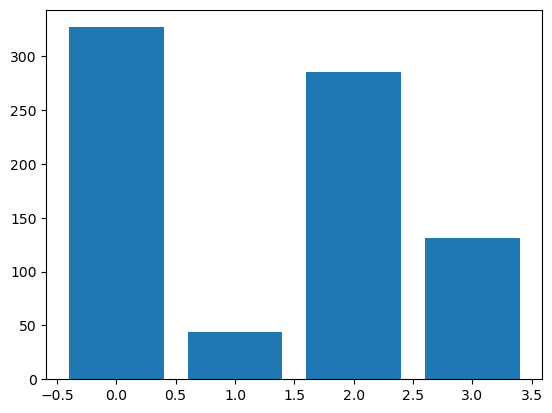

ucddb023
Class=0, n=282 (32.753%)
Class=2, n=453 (52.613%)
Class=3, n=69 (8.014%)
Class=1, n=57 (6.620%)


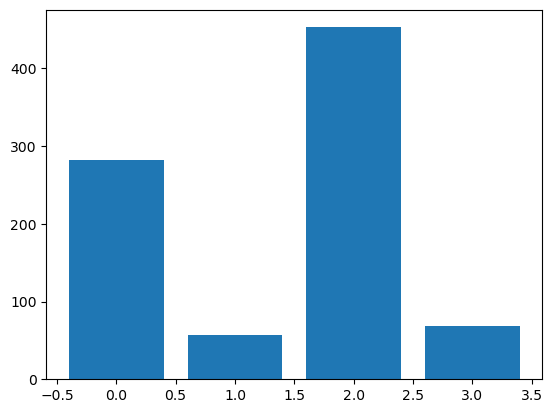

ucddb024
Class=0, n=155 (17.070%)
Class=4, n=4 (0.441%)
Class=2, n=444 (48.899%)
Class=1, n=168 (18.502%)
Class=3, n=137 (15.088%)


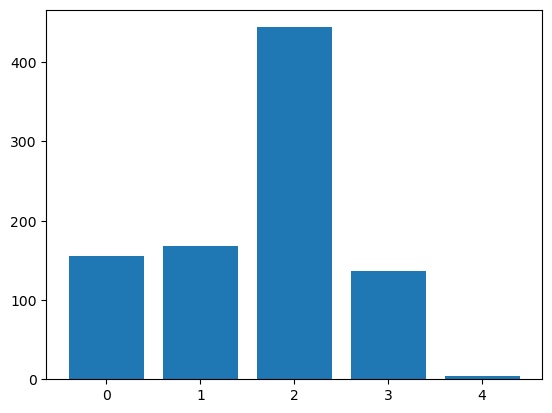

ucddb025
Class=0, n=163 (22.925%)
Class=2, n=493 (69.339%)
Class=3, n=9 (1.266%)
Class=1, n=46 (6.470%)


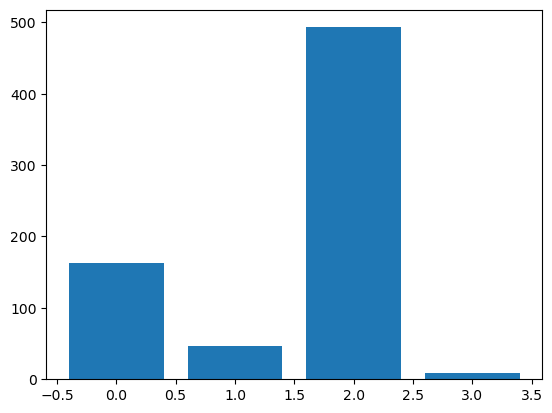

ucddb026
Class=0, n=112 (13.365%)
Class=2, n=341 (40.692%)
Class=3, n=139 (16.587%)
Class=1, n=246 (29.356%)


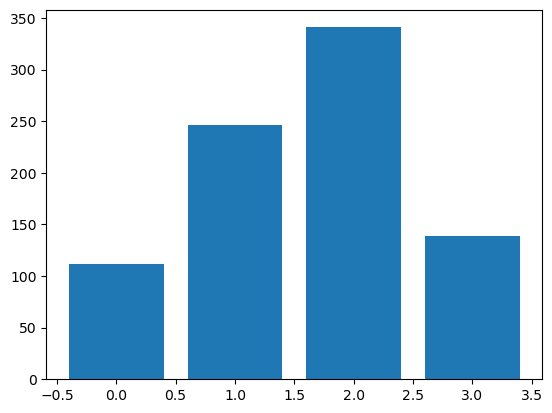

ucddb027
Class=0, n=127 (14.222%)
Class=2, n=592 (66.293%)
Class=3, n=35 (3.919%)
Class=1, n=139 (15.566%)


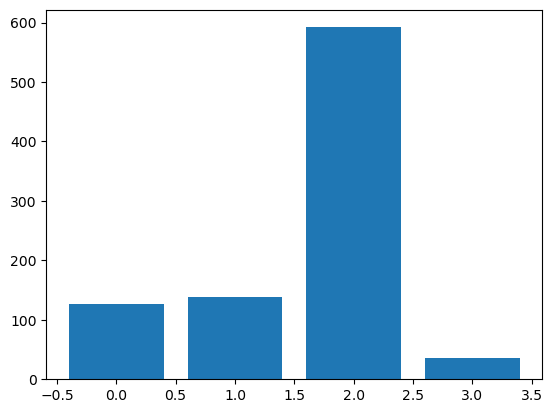

ucddb028
Class=0, n=228 (31.623%)
Class=2, n=345 (47.850%)
Class=3, n=52 (7.212%)
Class=1, n=96 (13.315%)


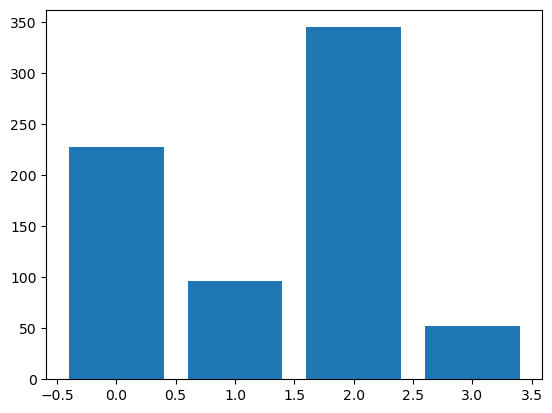

In [12]:
for record in data_base:
    print(record)
    stages=[]
    file=open(base_dir + 'data/' + record + '_stage.txt','r')
    for line in file:
        stg = int(line[0:1])
        if stg == 0: # Wake -> Wake
            stg = 0
        elif stg == 1: # Rem -> Rem
            stg = 1
        elif stg == 2 or stg == 3: # Stage 2, 3 -> Low
            stg = 2
        elif stg == 4 or stg == 5: # Stage 4, 5 -> Deep
            stg = 3
        stages.append(stg)
    result = {'stages':stages}
    with open(base_dir + 'stages/' + record + '.pkl', 'wb') as f:
        pickle.dump(result, f)
        
    y=stages
    y = LabelEncoder().fit_transform(y)
    # summarize distribution
    counter = Counter(y)
    for k,v in counter.items():
        per = v / len(y) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    # plot the distribution
    plt.bar(counter.keys(), counter.values())
    plt.show()

In [13]:
for record in data_base:
    stages = []
    ecg_mat = loadmat(base_dir + 'rec_to_mat/' + record + '.mat')
    ecg = ecg_mat['signal']
    ecg = np.array(ecg).flatten()
    #Z-Score Normalization 
    # ecg =stats.zscore(ecg)
    with open(base_dir + 'stages/' + record + '.pkl', 'rb') as f:
        result = pickle.load(f)
        stages = result['stages']
    
    
    ecg_win=[]
    win=[]
    j = 3840
    #windowing signal , window size is 5 min
    while j < (len(ecg)-((5*60*128)-3840)):
        win=ecg[j-3840: j+(5*60*128)-3840]
        ecg_win.append(win)
        j=j+3840
        
    ecg = np.reshape(ecg[:len(stages) * 3840], (len(stages), 3840)) #128hz * 30sec = 3840    
    ecg=np.array(ecg[:np.array(ecg_win).shape[0]])
    stages=stages[:np.array(ecg_win).shape[0]]
    print(record)
    print(np.array(ecg).shape)
    print(np.array(ecg_win).shape)
    print(len(stages))
    
    stages_temp=[]
    ecg_temp = []
    ecg_win_temp = []
    for i in range(0,len(stages)):
        if stages[i]==0 or stages[i]==1 or stages[i]==2 or stages[i]==3 :
            # print(i)
            stages_temp.append(stages[i])
            ecg_temp.append(ecg[i])
            ecg_win_temp.append(ecg_win[i])
        
    ecg=ecg_temp
    stages=stages_temp
    ecg_win=ecg_win_temp
 
        
    result = {'ecg': ecg , 'ecg_win':ecg_win,'stages': stages }
    with open(base_dir + 'all_ecg_stages/' + record + '_5min.pkl', 'wb') as f:
        pickle.dump(result, f)

ucddb002
(739, 3840)
(739, 38400)
739
ucddb003
(873, 3840)
(873, 38400)
873
ucddb005
(817, 3840)
(817, 38400)
817
ucddb006
(799, 3840)
(799, 38400)
799
ucddb007
(804, 3840)
(804, 38400)
804
ucddb008
(759, 3840)
(759, 38400)
759
ucddb009
(916, 3840)
(916, 38400)
916
ucddb010
(898, 3840)
(898, 38400)
898
ucddb011
(891, 3840)
(891, 38400)
891
ucddb012
(855, 3840)
(855, 38400)
855
ucddb013
(802, 3840)
(802, 38400)
802
ucddb014
(765, 3840)
(765, 38400)
765
ucddb015
(907, 3840)
(907, 38400)
907
ucddb017
(780, 3840)
(780, 38400)
780
ucddb018
(813, 3840)
(813, 38400)
813
ucddb019
(843, 3840)
(843, 38400)
843
ucddb020
(743, 3840)
(743, 38400)
743
ucddb021
(904, 3840)
(904, 38400)
904
ucddb022
(778, 3840)
(778, 38400)
778
ucddb023
(852, 3840)
(852, 38400)
852
ucddb024
(899, 3840)
(899, 38400)
899
ucddb025
(702, 3840)
(702, 38400)
702
ucddb026
(829, 3840)
(829, 38400)
829
ucddb027
(884, 3840)
(884, 38400)
884
ucddb028
(712, 3840)
(712, 38400)
712


In [14]:
# for record in data_base:
#     stages = []
#     ecg_mat = loadmat(base_dir + 'rec_to_mat/' + record + '.mat')
#     ecg = ecg_mat['signal']
#     ecg = np.array(ecg).flatten()
#     #Z-Score Normalization 
#     ecg =stats.zscore(ecg)
#     with open(base_dir + 'stages/' + record + '.pkl', 'rb') as f:
#         result = pickle.load(f)
#         stages = result['stages']
    
    
#     ecg_win=[]
#     win=[]
#     j = 3840
#     #windowing signal , window size is 1 min
#     while j < (len(ecg)-((1*60*128)-3840)):
#         win=ecg[j-3840: j+(1*60*128)-3840]
#         ecg_win.append(win)
#         j=j+3840
        
#     ecg = np.reshape(ecg[:len(stages) * 3840], (len(stages), 3840)) #128hz * 30sec = 3840    
#     ecg=np.array(ecg[:np.array(ecg_win).shape[0]])
#     stages=stages[:np.array(ecg_win).shape[0]]
#     print(record)
#     print(np.array(ecg).shape)
#     print(np.array(ecg_win).shape)
#     print(len(stages))
    
#     stages_temp=[]
#     ecg_temp = []
#     ecg_win_temp = []
#     for i in range(0,len(stages)):
#         if stages[i]==0 or stages[i]==1 or stages[i]==2 or stages[i]==3 :
#             # print(i)
#             stages_temp.append(stages[i])
#             ecg_temp.append(ecg[i])
#             ecg_win_temp.append(ecg_win[i])
        
#     ecg=ecg_temp
#     stages=stages_temp
#     ecg_win=ecg_win_temp
 
        
#     result = {'ecg': ecg , 'ecg_win':ecg_win,'stages': stages }
#     with open(base_dir + 'all_ecg_stages/' + record + '_1min.pkl', 'wb') as f:
#         pickle.dump(result, f)

In [15]:

# data_base = [f'ucddb{i:003d}' for i in range(2, 29)]
# data_base.remove('ucddb004')
# data_base.remove('ucddb016')
# print(data_base)

# for file in data_base:
#     print(file)
#     with open(base_dir + f'all_ecg_stages/{file}.pkl', 'rb') as f:
#         res = pickle.load(f)
#         stage = res['stages']
#         ecg = np.array(res['ecg'])
#     del res
#     ecg_10 = np.reshape(ecg[0], (3, 1280))
#     stage_10 = []  # Initialize stage_10 as an empty list
#     stage_10.append(stage[0])  # Append the first stage three times
#     stage_10.append(stage[0])
#     stage_10.append(stage[0])
#     for i in range(1, len(stage)):
#         ecg_10 = np.concatenate((ecg_10, np.reshape(ecg[i], (3, 1280))), axis=0)
#         stage_10.append(stage[i])  # Append each stage three times
#         stage_10.append(stage[i])
#         stage_10.append(stage[i])

#     print(np.array(ecg_10).shape)
#     print(len(stage_10))
#     result = {'ecg': ecg_10, 'stages': stage_10}
#     with open(base_dir + 'tenSecond/' + file + '.pkl', 'wb') as f:
#         pickle.dump(result, f)
  

In [16]:

data_base = [f'ucddb{i:003d}' for i in range(2, 29)]
data_base.remove('ucddb004')
data_base.remove('ucddb016')
print(data_base)

for file in data_base:
    print(file)
    with open(base_dir + f'tenSecond/{file}.pkl', 'rb') as f:
        res = pickle.load(f)
        stages = res['stages']
        ecg = np.array(res['ecg'])
    del res
    ecg = ecg.flatten()
    print(ecg.shape)
    
    ecg_win=[]
    win=[]
    j = 1280
    #windowing signal , window size is 1 min
    while j < (len(ecg)-((1*30*128)-1280)):
        win=ecg[j-1280: j+(1*30*128)-1280]
        ecg_win.append(win)
        j=j+1280
        
        
    stages=stages[:np.array(ecg_win).shape[0]]    
    print(np.array(ecg_win).shape)
    print(len(stages))
    
    
    result = {'ecg_win':ecg_win,'stages': stages }
    with open(base_dir + 'tenSecond/' + file + '_win.pkl', 'wb') as f:
        pickle.dump(result, f)

  

['ucddb002', 'ucddb003', 'ucddb005', 'ucddb006', 'ucddb007', 'ucddb008', 'ucddb009', 'ucddb010', 'ucddb011', 'ucddb012', 'ucddb013', 'ucddb014', 'ucddb015', 'ucddb017', 'ucddb018', 'ucddb019', 'ucddb020', 'ucddb021', 'ucddb022', 'ucddb023', 'ucddb024', 'ucddb025', 'ucddb026', 'ucddb027', 'ucddb028']
ucddb002
(2872320,)
(2241, 3840)
2241
ucddb003
(3386880,)
(2643, 3840)
2643
ucddb005
(3171840,)
(2475, 3840)
2475
ucddb006
(3102720,)
(2421, 3840)
2421
ucddb007
(3121920,)
(2436, 3840)
2436
ucddb008
(2906880,)
(2268, 3840)
2268
ucddb009
(3552000,)
(2772, 3840)
2772
ucddb010
(3482880,)
(2718, 3840)
2718
ucddb011
(3456000,)
(2697, 3840)
2697
ucddb012
(3317760,)
(2589, 3840)
2589
ucddb013
(3114240,)
(2430, 3840)
2430
ucddb014
(2972160,)
(2319, 3840)
2319
ucddb015
(3517440,)
(2745, 3840)
2745
ucddb017
(3029760,)
(2364, 3840)
2364
ucddb018
(3156480,)
(2463, 3840)
2463
ucddb019
(3271680,)
(2553, 3840)
2553
ucddb020
(2887680,)
(2253, 3840)
2253
ucddb021
(3505920,)
(2736, 3840)
2736
ucddb022
(30220